##### importing the necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("D:/sjc/data_set/ad_10000records.csv")
data
print(data.head())

   Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   
3                     59.88  28.0     56180.93                207.17   
4                     49.21  30.0     54324.73                201.58   

                         Ad Topic Line             City  Gender  \
0      Decentralized real-time circuit         Lisafort    Male   
1       Optional full-range projection  West Angelabury    Male   
2  Total 5thgeneration standardization        Reyesfurt  Female   
3          Balanced empowering success      New Michael  Female   
4  Total 5thgeneration standardization     West Richard  Female   

                        Country            Timestamp  Clicked on Ad  
0  Svalbard & Jan Mayen Islands  2016-06-09 21:43:05              0  
1                     Si

In [3]:
data["Clicked on Ad"] = data["Clicked on Ad"].map({0: "No", 
                               1: "Yes"})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  object 
dtypes: float64(4), object(6)
memory usage: 781.4+ KB


In [4]:
data["Age"].duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Name: Age, Length: 10000, dtype: bool

In [5]:
data['Clicked on Ad'].duplicated()

0       False
1        True
2        True
3        True
4       False
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Name: Clicked on Ad, Length: 10000, dtype: bool

In [6]:
data["Daily Internet Usage"].duplicated()

0       False
1       False
2        True
3        True
4       False
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Name: Daily Internet Usage, Length: 10000, dtype: bool

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
sum(data.duplicated())

0

No     5004
Yes    4781
Name: Clicked on Ad, dtype: int64


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

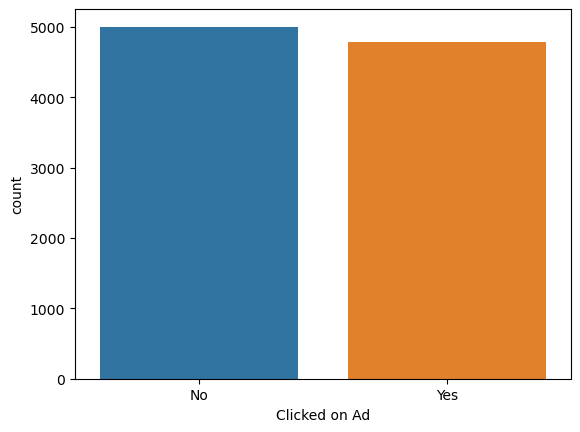

In [9]:
print(data['Clicked on Ad'].value_counts())
sns.countplot(x='Clicked on Ad',data=data)

In [10]:
data_final = data.drop(['Timestamp', 'Ad Topic Line', 'Country', 'City'], axis=1)

In [11]:
data_final.head()

Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  Gender  \
0                     62.26  32.0     69481.85                172.83    Male   
1                     41.73  31.0     61840.26                207.17    Male   
2                     44.40  30.0     57877.15                172.83  Female   
3                     59.88  28.0     56180.93                207.17  Female   
4                     49.21  30.0     54324.73                201.58  Female   

  Clicked on Ad  
0            No  
1            No  
2            No  
3            No  
4           Yes

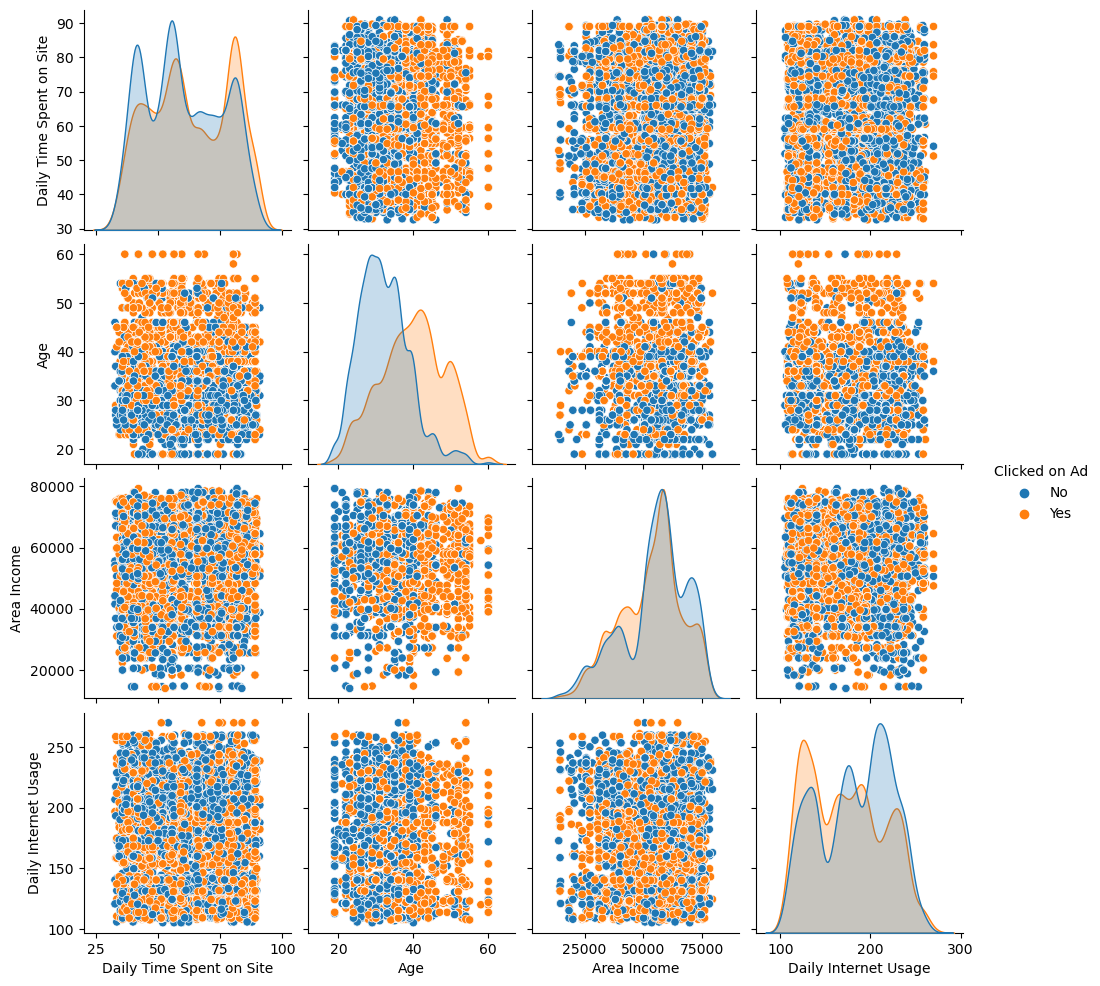

In [12]:
sns.pairplot(data_final,hue='Clicked on Ad')

In [13]:

# Shuffle the DataFrame rows & return all rows
data=data.sample(frac = 1)
data.shape

(9785, 10)

In [14]:
data.dropna(inplace=True)

In [15]:
#creating a EDA report
import sweetviz as sv
analyze_report = sv.analyze(data)
analyze_report.show_html('analyze.html', open_browser=True)

                                             |                                             | [  0%]   00:00 ->…

Report analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
data_final.corr()

Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000  0.093117     0.020948   
Age                                       0.093117  1.000000    -0.041493   
Area Income                               0.020948 -0.041493     1.000000   
Daily Internet Usage                     -0.052702 -0.101728     0.041249   

                          Daily Internet Usage  
Daily Time Spent on Site             -0.052702  
Age                                  -0.101728  
Area Income                           0.041249  
Daily Internet Usage                  1.000000

<AxesSubplot:>

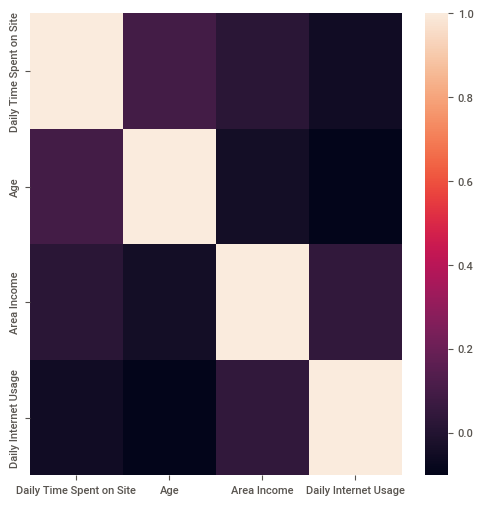

In [17]:
plt.figure(figsize=(6, 6))
sns.heatmap(data_final.corr())

In [18]:
fig = px.box(data, 
             x="Daily Time Spent on Site",  
             color="Clicked on Ad", 
             title="Click Through Rate based Time Spent on Site", 
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [19]:
fig = px.box(data, 
             x="Daily Internet Usage",  
             color="Clicked on Ad", 
             title="Click Through Rate based on Daily Internet Usage", 
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [20]:
fig = px.box(data, 
             x="Age",  
             color="Clicked on Ad", 
             title="Click Through Rate based on Age", 
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [21]:

fig = px.box(data, 
             x="Area Income",  
             color="Clicked on Ad", 
             title="Click Through Rate based on Income", 
             color_discrete_map={'Yes':'blue',
                                 'No':'red'})
fig.update_traces(quartilemethod="exclusive")
fig.show()

In [22]:
click_through_rate = 4917 / 10000 * 100
click_through_rate

49.17

In [23]:
data.isnull()

Daily Time Spent on Site    Age  Area Income  Daily Internet Usage  \
5207                     False  False        False                 False   
78                       False  False        False                 False   
4686                     False  False        False                 False   
7945                     False  False        False                 False   
451                      False  False        False                 False   
...                        ...    ...          ...                   ...   
6911                     False  False        False                 False   
5252                     False  False        False                 False   
4116                     False  False        False                 False   
7059                     False  False        False                 False   
4609                     False  False        False                 False   

      Ad Topic Line   City  Gender  Country  Timestamp  Clicked on Ad  
5207          False  False   False    False      False          False  
78            False  False   False    False      False          False  
4686          False  False   False    False      False          False  
7945          False  False   False    False      False          False  
451           False  False   False    False      False          False  
...             ...    ...     ...      ...        ...            ...  
6911          False  False   False    False      False          False  
5252          False  False   False    False      False          False  
4116          False  False   False    False      False          False  
7059          False  False   False    False      False          False  
4609          False  False   False    False      False          False  

[9785 rows x 10 columns]

In [24]:
from sklearn.model_selection import train_test_split


data["Gender"] = data["Gender"].map({"Male": 1, 
                               "Female": 0})

x=data.iloc[:,0:7]
x=x.drop(['Ad Topic Line','City'],axis=1)
y=data.iloc[:,9]



In [25]:
data.shape

(9785, 10)

In [26]:
## train and test data splitting 

x_train,x_test, y_train,y_test=train_test_split(x,y,
                                           test_size=0.1,
                                           random_state=4)

In [27]:
x_test.fillna(x_train.mean(), inplace=True)
x_test = x_test.fillna(x_train.mean())
x_test._is_view

False

In [28]:
x_train.isnull()

Daily Time Spent on Site    Age  Area Income  Daily Internet Usage  \
1084                     False  False        False                 False   
6688                     False  False        False                 False   
3387                     False  False        False                 False   
8276                     False  False        False                 False   
9240                     False  False        False                 False   
...                        ...    ...          ...                   ...   
633                      False  False        False                 False   
5689                     False  False        False                 False   
3946                     False  False        False                 False   
8725                     False  False        False                 False   
5652                     False  False        False                 False   

      Gender  
1084   False  
6688   False  
3387   False  
8276   False  
9240   False  
...      ...  
633    False  
5689   False  
3946   False  
8725   False  
5652   False  

[8806 rows x 5 columns]

In [29]:
data.dropna(inplace=True)

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [31]:
m1 = RandomForestClassifier()
m2 = LogisticRegression()

In [32]:
print(m1.fit(x_train,y_train))
m2.fit(x_train,y_train)

RandomForestClassifier()


LogisticRegression()

In [33]:
from sklearn.metrics import accuracy_score as ac
print(str(m1)+ "'s accuracy score: '"+ str(ac(m1.predict(x_test), y_test)))
print(str(m2)+ "'s accuracy score: '"+ str(ac(m2.predict(x_test), y_test)))

RandomForestClassifier()'s accuracy score: '0.7752808988764045
LogisticRegression()'s accuracy score: '0.7160367722165475


In [34]:
print("Ads Click Through Rate Prediction : ")
a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")
features = np.array([[a, b, c, d, e]])

Ads Click Through Rate Prediction : 
Daily Time Spent on Site: 2343
Age: 56
Area Income: 3453
Daily Internet Usage: 65
Gender (Male = 1, Female = 0) : 1


In [35]:
print("Will the user click on ad = ", getVal(m1, features))
print("Will the user click on ad = ", getVal(m2, features))

NameError: name 'getVal' is not defined